In [1]:
import torch 
import torchvision
from torchvision.transforms import ToTensor, Normalize,Compose
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

mnist =MNIST(root='data',
            train=True, 
            download=True,
            transform = Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))]))

In [2]:
img, label = mnist[0]
print("label",label)
print(img[:,10:15, 10:15])
torch.min(img), torch.max(img)

label 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [20]:
def denorm(x):
    out =(x+1)/2
#     print(out)
    return out.clamp(0,1)

In [21]:
"""denorm(img)"""

'denorm(img)'

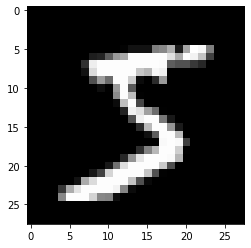

In [22]:
img_norm = denorm(img)
plt.imshow(img[0], cmap='gray')

In [23]:
from torch.utils.data import DataLoader
batch_size =200
dataloader = DataLoader(mnist,batch_size, shuffle=True)

First Batch
torch.Size([200, 1, 28, 28])
tensor([8, 3, 9, 1, 4, 4, 6, 7, 6, 4, 8, 2, 4, 3, 6, 1, 8, 4, 2, 6, 7, 0, 2, 5,
        4, 3, 1, 8, 7, 0, 5, 8, 4, 9, 0, 7, 6, 0, 2, 7, 4, 2, 7, 5, 9, 4, 4, 8,
        0, 4, 8, 2, 7, 5, 2, 5, 0, 4, 1, 0, 8, 9, 3, 8, 1, 4, 7, 5, 1, 0, 1, 0,
        1, 9, 1, 4, 0, 3, 2, 5, 2, 4, 4, 6, 4, 0, 0, 9, 7, 8, 3, 1, 9, 2, 0, 8,
        2, 8, 0, 2, 1, 6, 9, 7, 0, 0, 0, 5, 7, 1, 7, 9, 2, 1, 8, 7, 3, 5, 7, 5,
        3, 1, 6, 0, 7, 7, 4, 0, 2, 0, 3, 8, 3, 6, 5, 6, 4, 0, 1, 4, 5, 2, 0, 5,
        8, 3, 6, 9, 4, 0, 3, 0, 9, 2, 1, 2, 3, 5, 3, 5, 4, 4, 0, 7, 3, 0, 8, 2,
        0, 3, 5, 9, 0, 0, 8, 2, 1, 1, 4, 2, 2, 3, 7, 1, 0, 3, 1, 8, 1, 1, 8, 3,
        2, 8, 9, 6, 8, 9, 8, 6])


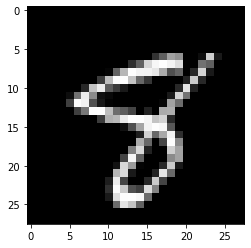

In [24]:
for img_batch, label_batch in dataloader:
    print("First Batch")
    print(img_batch.shape)
    plt.imshow(img_batch[0][0],cmap="gray")
    print(label_batch)
    break

In [25]:
#check GPU is available or not
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [26]:
device

device(type='cpu')

In [27]:
#Lets move to the classification
import torch.nn as nn

### Build Model

In [31]:
class MNistModel(ImageClassificationBase):
    
    def __init__(self):
        self.network = nn.Sequential(nn.Conv2d(3, 28, kernel_size=3, padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2,2), #out check after those parameter
                                     
                                     nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
                                     
                                     nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
                                     
                                     nn.Flatten(), 
                                     nn.Linear(256*4*4, 1024),
                                     nn.ReLU(),
                                     nn.Linear(1024, 512),
                                     nn.ReLU(),
                                     nn.Linear(512, 10))

            
    def forward(self, xb):
        return self.network(xb)

In [32]:
model = MNistModel()
model

AttributeError: cannot assign module before Module.__init__() call